In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class LPP(object):
    def __init__(self,  num_eigen, how = "gaussian", h = 0.1):
        self.num_eigen = num_eigen #抽出する固有ベクトルの数
        self.how = how
        self.h = h
        
    def _gaussian_kernel(self, x1, x2, h, axis = None):
        if axis is not None:
            return np.sum(np.exp(-(x1 - x2) ** 2 / (2 * (h ** 2))), axis = axis)
        else:
            return np.exp(-(x1 - x2) ** 2 / (2 * (h ** 2)))
        
    def _neighbor_graph(self, X):
        samples = X.shape[0]
        self.W = np.zeros((samples, samples))
        self.D = np.zeros((samples, samples))
        for i in range(samples):
            self.W[i] = self._gaussian_kernel(X, X[i], self.h, axis = 1)
            self.D[i][i] = np.sum(self.W[i])
        self.L = self.D - self.W
        return self.W, self.D, self.L
        
    def fit_transform(self, X):
        W, D, L = self._neighbor_graph(X)
        tmp = np.linalg.inv(X.transpose().dot(D).dot(X))
        tmp_ = tmp.dot(X.transpose()).dot(L).dot(X).dot(tmp)
        la, v = np.linalg.eig(tmp_)
        #v = v / v.sum(axis = 1)
        largest_la = np.argsort(la)[-self.num_eigen:]
        self.T = v[largest_la]
        return self.T.transpose().dot(self.T).dot(X.transpose())
    
    def transform(self, X):
        return self.T.transpose().dot(self.T).dot(X.transpose())

In [3]:
n = 100
u = np.random.randn(n) * 2
v = np.random.randn(n)
X1 = np.dstack([u, v])[0]
v = 4 * np.random.randint(0, 2, n) - 2 + np.random.randn(n)/3
X2 = np.dstack([u, v])[0]

In [4]:
lpp1 = LPP(num_eigen=1)
_ = lpp1.fit_transform(X1)

In [5]:
lpp1.T

array([[ 0.14905551, -0.98882883]])

In [6]:
def boundary(v):
    idx = np.linspace(-6, 6, 20)
    return pd.Series(-v[0]/v[1] * idx, index = idx)

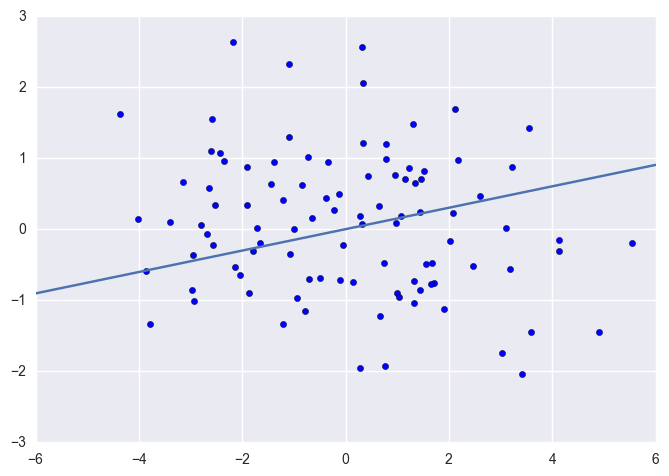

In [7]:
fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1])
boundary(lpp1.T[0]).plot(ax = ax)

In [8]:
lpp2 = LPP(num_eigen=1)
_ = lpp2.fit_transform(X2)

(-4, 4)

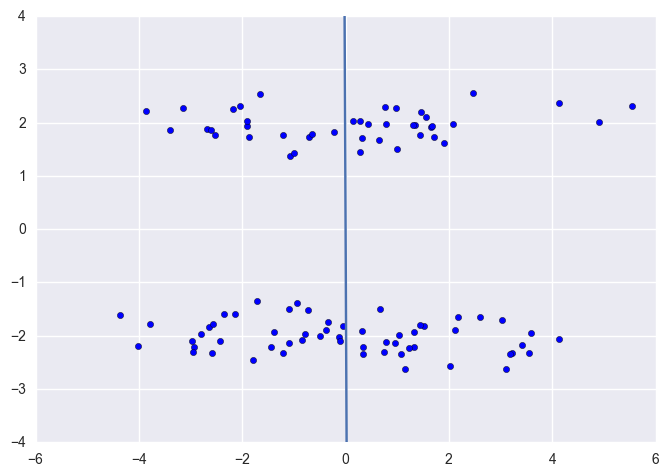

In [9]:
fig, ax = plt.subplots()
ax.scatter(X2[:, 0], X2[:, 1])
boundary(lpp2.T[0]).plot(ax = ax)
ax.set_ylim(-4, 4)

In [10]:
lpp2.T

array([[ 0.99998812,  0.00487358]])